In [4]:
#Ignoring TF warning messages
import logging, os
logging.disable(logging.WARNING)
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "3" #21BAI1210

In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import VGG16, ResNet50, ResNet152
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [6]:
# Load MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [7]:
#Preprocessing

# Normalize pixel values
X_train = X_train / 255.0
X_test = X_test / 255.0

# Resize images to 32x32 and convert to RGB
X_train_resized = tf.image.grayscale_to_rgb(tf.image.resize(X_train[..., np.newaxis], (32, 32)))
X_test_resized = tf.image.grayscale_to_rgb(tf.image.resize(X_test[..., np.newaxis], (32, 32)))

# Convert to numpy arrays
X_train_resized = X_train_resized.numpy()
X_test_resized = X_test_resized.numpy()

# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


2024-03-22 09:59:46.796621: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-22 09:59:46.997784: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-22 09:59:46.997895: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-22 09:59:47.006081: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-03-22 09:59:47.006156: I external/local_xla/xla/stream_executor

In [8]:
# Load pre-trained models
vgg_base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
resnet50_base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))
resnet152_base_model = ResNet152(weights='imagenet', include_top=False, input_shape=(32, 32,
3))
# Freeze the convolutional bases
vgg_base_model.trainable = False
resnet50_base_model.trainable = False
resnet152_base_model.trainable = False

234698864/234698864 [==============================] - 104s 0us/step


In [9]:
# Create models on top of pre-trained models
vgg_model = Sequential([
 vgg_base_model,
 Flatten(),
 Dense(128, activation='relu'),
 Dense(10, activation='softmax')
])

In [10]:
resnet50_model = Sequential([
 resnet50_base_model,
 Flatten(),
 Dense(128, activation='relu'),
 Dense(10, activation='softmax')
])
resnet152_model = Sequential([
 resnet152_base_model,
 Flatten(),
 Dense(128, activation='relu'),
 Dense(10, activation='softmax')
])


In [12]:
# Compile models
vgg_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
resnet50_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
resnet152_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
# Train models
vgg_history = vgg_model.fit(X_train_resized, y_train, epochs=5, validation_data=(X_test_resized,
y_test))

Epoch 1/5
1875/1875 [==============================] - 21s 11ms/step - loss: 2.0160 - accuracy: 0.2206 - val_loss: 1.9874 - val_accuracy: 0.2291
Epoch 2/5
1875/1875 [==============================] - 20s 11ms/step - loss: 1.9987 - accuracy: 0.2243 - val_loss: 1.9723 - val_accuracy: 0.2341
Epoch 3/5
1875/1875 [==============================] - 20s 11ms/step - loss: 1.9890 - accuracy: 0.2248 - val_loss: 1.9671 - val_accuracy: 0.2277
Epoch 4/5
1875/1875 [==============================] - 20s 11ms/step - loss: 1.9775 - accuracy: 0.2283 - val_loss: 1.9487 - val_accuracy: 0.2376
Epoch 5/5
1875/1875 [==============================] - 20s 11ms/step - loss: 1.9718 - accuracy: 0.2286 - val_loss: 1.9467 - val_accuracy: 0.2374


In [15]:
resnet50_history = resnet50_model.fit(X_train_resized, y_train, epochs=5,
validation_data=(X_test_resized, y_test))

Epoch 1/5
1875/1875 [==============================] - 35s 16ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 2/5
1875/1875 [==============================] - 27s 14ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 3/5
1875/1875 [==============================] - 27s 15ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 4/5
1875/1875 [==============================] - 27s 14ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 5/5
1875/1875 [==============================] - 28s 15ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135


In [16]:
resnet152_history = resnet152_model.fit(X_train_resized, y_train, epochs=5,
validation_data=(X_test_resized, y_test))

Epoch 1/5
1875/1875 [==============================] - 72s 32ms/step - loss: 2.3058 - accuracy: 0.1088 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 2/5
1875/1875 [==============================] - 53s 28ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 3/5
1875/1875 [==============================] - 56s 30ms/step - loss: 2.3014 - accuracy: 0.1124 - val_loss: 2.3011 - val_accuracy: 0.1135
Epoch 4/5
1875/1875 [==============================] - 54s 29ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135
Epoch 5/5
1875/1875 [==============================] - 55s 29ms/step - loss: 2.3013 - accuracy: 0.1124 - val_loss: 2.3010 - val_accuracy: 0.1135


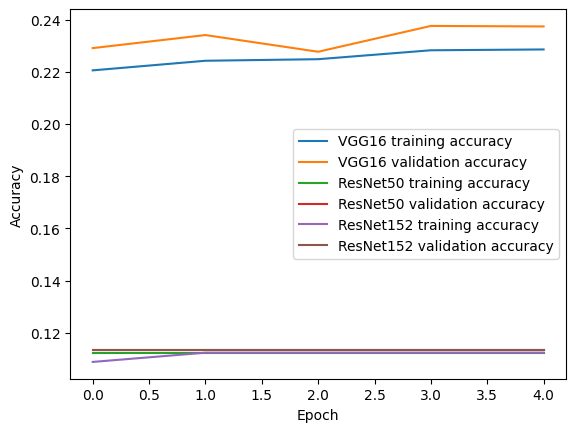

In [19]:
# Plot training history
plt.plot(vgg_history.history['accuracy'], label='VGG16 training accuracy')
plt.plot(vgg_history.history['val_accuracy'], label='VGG16 validation accuracy')
plt.plot(resnet50_history.history['accuracy'], label='ResNet50 training accuracy')
plt.plot(resnet50_history.history['val_accuracy'], label='ResNet50 validation accuracy')
plt.plot(resnet152_history.history['accuracy'], label='ResNet152 training accuracy')
plt.plot(resnet152_history.history['val_accuracy'], label='ResNet152 validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show() #21BAI1210

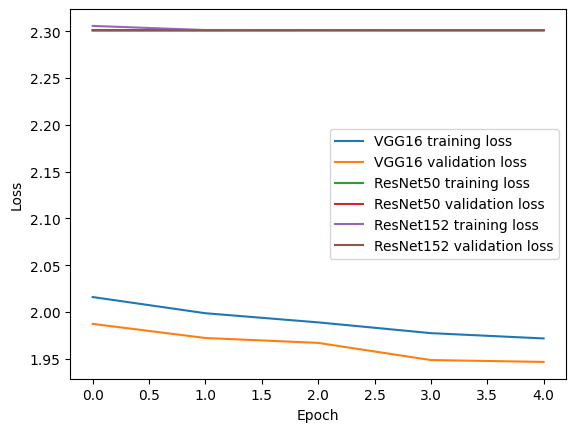

In [18]:
# Plot training history
plt.plot(vgg_history.history['loss'], label='VGG16 training loss')
plt.plot(vgg_history.history['val_loss'], label='VGG16 validation loss')
plt.plot(resnet50_history.history['loss'], label='ResNet50 training loss')
plt.plot(resnet50_history.history['val_loss'], label='ResNet50 validation loss')
plt.plot(resnet152_history.history['loss'], label='ResNet152 training loss')
plt.plot(resnet152_history.history['val_loss'], label='ResNet152 validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show() #21BAI1210